### How do company benefits change with company size within specific industries?

this question investigates the relationship between company benefits, company size, and industries. 
To answer this question, several tables should be joined toegtehr to collect all the useful information then run the model. Each table should be cleaned on its own then the join should happen as follows:

1. benefits table 
2. turn benefits into dummy variables to avoid duplicated rows in job_id and to make it easier once the model is created
4. join with posting table using job_id 
3. join with employees table which has the number of employees per company through company_id
4. join with companies table 
5. join industries mapping table to company_industries then to our table
6. now, the data is cleaned, merged, and handled so we can move on the creating the model


In [286]:
import pandas as pd

In [287]:
benefits = pd.read_csv('jobs/benefits.csv')
benefits

,job_id,inferred,type
0,3887473071,0,Medical insurance
1,3887473071,0,Vision insurance
2,3887473071,0,Dental insurance
3,3887473071,0,401(k)
4,3887473071,0,Student loan assistance
...,...,...,...
67938,3902878689,0,Dental insurance
67939,3902878689,0,Pension plan
67940,3902878689,0,Tuition assistance
67941,3902878689,0,Disability insurance


In [288]:
# check for duplicates in job_id
benefits['job_id'].duplicated().sum()

37920

In [289]:
benefits.duplicated().sum()

0

since we have different benefits for the same job, in different rows, well merge them into single rows by making the benefit type into a dummy variable

In [290]:
benefits['type'].value_counts()


type
401(k)                     24231
Medical insurance           9873
Vision insurance            9309
Disability insurance        7930
Dental insurance            6868
Tuition assistance          2614
Commuter benefits           2226
Paid maternity leave        1808
Paid paternity leave        1540
Pension plan                 906
Student loan assistance      365
Child care support           273
Name: count, dtype: int64

In [291]:
benefits_dummies = pd.get_dummies(benefits['type'], prefix='benefit')
benefits_dummies['job_id'] = benefits['job_id']

benefits_final = benefits_dummies.groupby('job_id').max().reset_index()
benefits_final

,job_id,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance
0,23221523,True,False,False,False,False,False,False,False,False,False,False,False
1,56482768,True,False,False,True,True,False,False,False,False,False,False,False
2,69333422,True,False,False,True,False,True,False,False,False,False,False,True
3,95428182,False,False,False,True,True,True,False,False,False,False,False,False
4,111513530,False,False,False,True,False,True,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30018,3906266212,True,False,False,True,False,False,False,False,False,False,False,True
30019,3906266229,False,False,False,True,True,True,False,False,False,False,False,True
30020,3906266248,True,False,False,False,False,True,False,False,False,False,False,True
30021,3906266272,True,False,False,True,False,True,False,False,False,False,False,True


In [292]:
benefits

,job_id,inferred,type
0,3887473071,0,Medical insurance
1,3887473071,0,Vision insurance
2,3887473071,0,Dental insurance
3,3887473071,0,401(k)
4,3887473071,0,Student loan assistance
...,...,...,...
67938,3902878689,0,Dental insurance
67939,3902878689,0,Pension plan
67940,3902878689,0,Tuition assistance
67941,3902878689,0,Disability insurance


In [293]:
benefits.isnull().sum()

job_id      0
inferred    0
type        0
dtype: int64

In [299]:
postings = pd.read_csv("postings_cleaned.csv")
#display all columns
pd.set_option('display.max_columns', None)
postings

,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,"Princeton, NJ",2774458.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,41600.0,35360.0,53040.0
1,1829192,Liberty Healthcare and Rehabilitation Services,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...","Fort Collins, CO",NaN,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,104000.0,62400.0,53040.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,"Cincinnati, OH",64896719.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,65000.0,45000.0,25.5
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5
4,35982263,Liberty Healthcare and Rehabilitation Services,Service Technician,Looking for HVAC service tech with experience ...,"Burlington, IA",NaN,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,"Walnut Creek, CA",56120.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,195000.0,120000.0,25.5
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,United States,1124131.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,"Spokane, WA",90552133.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,"Texas, United States",2793699.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5


In [300]:
postings.columns

Index(['job_id', 'company_name', 'title', 'description', 'location',
       'company_id', 'formatted_work_type', 'application_type', 'work_type',
       'currency', 'compensation_type', 'standardized_max_salary',
       'standardized_min_salary', 'standardized_med_salary'],
      dtype='object')

In [301]:
benefits_postings = pd.merge(postings, benefits_final, on='job_id', how='left')
benefits_postings


,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,"Princeton, NJ",2774458.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,41600.0,35360.0,53040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1829192,Liberty Healthcare and Rehabilitation Services,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...","Fort Collins, CO",NaN,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,104000.0,62400.0,53040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,"Cincinnati, OH",64896719.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,65000.0,45000.0,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False
4,35982263,Liberty Healthcare and Rehabilitation Services,Service Technician,Looking for HVAC service tech with experience ...,"Burlington, IA",NaN,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,"Walnut Creek, CA",56120.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,195000.0,120000.0,25.5,True,False,False,True,False,True,True,True,False,False,False,True
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,United States,1124131.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,"Spokane, WA",90552133.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,"Texas, United States",2793699.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
benefits_postings.isnull().sum()

job_id                                 0
company_name                           0
title                                  0
description                            7
location                               0
company_id                          1717
formatted_work_type                    0
application_type                       0
work_type                              0
currency                               0
compensation_type                      0
standardized_max_salary                0
standardized_min_salary                0
standardized_med_salary                0
benefit_401(k)                     95114
benefit_Child care support         95114
benefit_Commuter benefits          95114
benefit_Dental insurance           95114
benefit_Disability insurance       95114
benefit_Medical insurance          95114
benefit_Paid maternity leave       95114
benefit_Paid paternity leave       95114
benefit_Pension plan               95114
benefit_Student loan assistance    95114
benefit_Tuition 

In [303]:
benefits['job_id'].nunique()

30023

In [304]:
postings['job_id'].nunique()

123849

In [305]:
benefits_postings = benefits_postings.dropna()

In [294]:
employees = pd.read_csv("cleanedData/new_employee_counts.csv")
employees

,company_id,employee_count,follower_count,time_recorded
0,391906,186,32508,2024-04-05 19:42:53
1,22292832,311,4471,2024-04-05 19:42:53
2,20300,1053,6554,2024-04-05 19:42:53
3,3570660,383,35241,2024-04-05 19:42:53
4,878353,52,26397,2024-04-05 19:42:53
...,...,...,...,...
35782,2852377,1999,7943,2024-04-20 00:27:39
35783,64379,144,31910,2024-04-20 00:27:39
35784,19114724,4,102,2024-04-20 00:27:39
35785,307079,602,32199,2024-04-20 00:27:39


In [295]:
employees.isnull().sum()

company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64

In [296]:
employees['company_id'].duplicated().sum()

11314

In [297]:
#filter employees_count to the latest time_recorded
employees = employees.sort_values('time_recorded').drop_duplicates('company_id', keep='last')

In [298]:
employees['company_id'].duplicated().sum()

0

In [307]:
final_data = pd.merge(benefits_postings, employees[['company_id', 'employee_count']], on='company_id', how='left')

In [306]:
companies = pd.read_csv("cleanedData/companies_cleaned.csv")

In [308]:
final_data = pd.merge(final_data, companies[['company_id', 'company_size']] , on='company_id', how='left')
final_data

,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance,employee_count,company_size
0,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,222,2.0
1,69333422,Staffing Theory,Senior Product Marketing Manager,A leading pharmaceutical company committed to ...,United States,27097933.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,True,False,False,False,False,False,True,7,1.0
2,95428182,CLEVELAND KIDS BOOK BANK,Administrative Coordinator,Job Title: Administrative CoordinatorOrganizat...,"Cleveland, OH",55624331.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,166400000.0,124800000.0,52000.0,False,False,False,True,True,True,False,False,False,False,False,False,6,NaN
3,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",Greater Philadelphia,4028816.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,True,False,True,True,True,True,False,False,True,40,4.0
4,117675818,Premier Family Clinic,Physician Assistant,We are seeking a qualified Physician Assistant...,"Atlanta, GA",4285947.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,False,False,True,False,False,False,False,False,False,11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28523,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...","Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,93600.0,72800.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0
28524,3906266212,Synectics Inc.,Phlebotomist - Float,Job Description\n\nThe Patient Services Repres...,"Carroll County, MD",413796.0,Contract,OffsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,False,False,False,False,False,False,True,141,3.0
28525,3906266248,GoodRx,"Account Manager, Client Success",GoodRx is America’s healthcare marketplace. Ea...,United States,2466850.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,True,False,False,False,False,False,True,1044,4.0
28526,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0


In [309]:
final_data.isnull().sum()

job_id                               0
company_name                         0
title                                0
description                          0
location                             0
company_id                           0
formatted_work_type                  0
application_type                     0
work_type                            0
currency                             0
compensation_type                    0
standardized_max_salary              0
standardized_min_salary              0
standardized_med_salary              0
benefit_401(k)                       0
benefit_Child care support           0
benefit_Commuter benefits            0
benefit_Dental insurance             0
benefit_Disability insurance         0
benefit_Medical insurance            0
benefit_Paid maternity leave         0
benefit_Paid paternity leave         0
benefit_Pension plan                 0
benefit_Student loan assistance      0
benefit_Tuition assistance           0
benefit_Vision insurance 

In [310]:
final_data.dropna(inplace=True)

In [311]:
final_data.duplicated().sum()

0

In [312]:
benefit_columns = [col for col in final_data.columns if col.startswith('benefit_')]
final_data['num_benefits'] = final_data[benefit_columns].sum(axis=1)

print(final_data['num_benefits'].dtype)
final_data



object


,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance,employee_count,company_size,num_benefits
0,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,222,2.0,1
1,69333422,Staffing Theory,Senior Product Marketing Manager,A leading pharmaceutical company committed to ...,United States,27097933.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,True,False,False,False,False,False,True,7,1.0,4
3,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",Greater Philadelphia,4028816.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,True,False,True,True,True,True,False,False,True,40,4.0,6
4,117675818,Premier Family Clinic,Physician Assistant,We are seeking a qualified Physician Assistant...,"Atlanta, GA",4285947.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,False,False,True,False,False,False,False,False,False,11,1.0,1
6,231010577,Pierce Refrigeration,Service / Construction Technician,Company DescriptionPierce Refrigeration is a f...,"West Bridgewater, MA",6482450.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,10,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28523,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...","Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,93600.0,72800.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4
28524,3906266212,Synectics Inc.,Phlebotomist - Float,Job Description\n\nThe Patient Services Repres...,"Carroll County, MD",413796.0,Contract,OffsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,False,False,False,False,False,False,True,141,3.0,3
28525,3906266248,GoodRx,"Account Manager, Client Success",GoodRx is America’s healthcare marketplace. Ea...,United States,2466850.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,True,False,False,False,False,False,True,1044,4.0,3
28526,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4


In [313]:
final_data['title'].nunique()

17854

In [314]:
final_data.columns

Index(['job_id', 'company_name', 'title', 'description', 'location',
       'company_id', 'formatted_work_type', 'application_type', 'work_type',
       'currency', 'compensation_type', 'standardized_max_salary',
       'standardized_min_salary', 'standardized_med_salary', 'benefit_401(k)',
       'benefit_Child care support', 'benefit_Commuter benefits',
       'benefit_Dental insurance', 'benefit_Disability insurance',
       'benefit_Medical insurance', 'benefit_Paid maternity leave',
       'benefit_Paid paternity leave', 'benefit_Pension plan',
       'benefit_Student loan assistance', 'benefit_Tuition assistance',
       'benefit_Vision insurance', 'employee_count', 'company_size',
       'num_benefits'],
      dtype='object')

In [315]:
employees['employee_count'].unique()

array([   79,    11,   102, ..., 10007,  2701, 13592])

In [317]:
final_data.isnull().sum()

job_id                             0
company_name                       0
title                              0
description                        0
location                           0
company_id                         0
formatted_work_type                0
application_type                   0
work_type                          0
currency                           0
compensation_type                  0
standardized_max_salary            0
standardized_min_salary            0
standardized_med_salary            0
benefit_401(k)                     0
benefit_Child care support         0
benefit_Commuter benefits          0
benefit_Dental insurance           0
benefit_Disability insurance       0
benefit_Medical insurance          0
benefit_Paid maternity leave       0
benefit_Paid paternity leave       0
benefit_Pension plan               0
benefit_Student loan assistance    0
benefit_Tuition assistance         0
benefit_Vision insurance           0
employee_count                     0
c

In [318]:
final_data


,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance,employee_count,company_size,num_benefits
0,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,222,2.0,1
1,69333422,Staffing Theory,Senior Product Marketing Manager,A leading pharmaceutical company committed to ...,United States,27097933.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,True,False,False,False,False,False,True,7,1.0,4
3,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",Greater Philadelphia,4028816.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,True,False,True,True,True,True,False,False,True,40,4.0,6
4,117675818,Premier Family Clinic,Physician Assistant,We are seeking a qualified Physician Assistant...,"Atlanta, GA",4285947.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,False,False,True,False,False,False,False,False,False,11,1.0,1
6,231010577,Pierce Refrigeration,Service / Construction Technician,Company DescriptionPierce Refrigeration is a f...,"West Bridgewater, MA",6482450.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,10,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28523,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...","Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,93600.0,72800.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4
28524,3906266212,Synectics Inc.,Phlebotomist - Float,Job Description\n\nThe Patient Services Repres...,"Carroll County, MD",413796.0,Contract,OffsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,False,False,False,False,False,False,True,141,3.0,3
28525,3906266248,GoodRx,"Account Manager, Client Success",GoodRx is America’s healthcare marketplace. Ea...,United States,2466850.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,True,False,False,False,False,False,True,1044,4.0,3
28526,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4


In [319]:
#merge job_industries with industries_with_clusters
industries_with_clusters = pd.read_csv('cleanedData/industries_with_clusters.csv')
job_industries = pd.read_csv("jobs/job_industries.csv")

industries = pd.merge(job_industries, industries_with_clusters, on='industry_id', how='left')
industries


,job_id,industry_id,industry_name,cluster
0,3884428798,82,Book and Periodical Publishing,"Marketing, Advertising, and Publishing"
1,3887473071,48,Construction,Miscellaneous and Other Services
2,3887465684,41,Banking,Finance and Banking
3,3887467939,82,Book and Periodical Publishing,"Marketing, Advertising, and Publishing"
4,3887467939,80,Advertising Services,"Marketing, Advertising, and Publishing"
...,...,...,...,...
164803,3902882321,104,Staffing and Recruiting,Professional Services and Consulting
164804,3902879720,27,Retail,Miscellaneous and Other Services
164805,3902876855,80,Advertising Services,"Marketing, Advertising, and Publishing"
164806,3902878689,116,"Transportation, Logistics, Supply Chain and St...",Transportation and Logistics


In [320]:
industries.drop(columns=['industry_name'], inplace=True)

In [321]:
industries.isnull().sum()

job_id         0
industry_id    0
cluster        0
dtype: int64

In [322]:
# merge industries with final data based on job_id
final_data = pd.merge(final_data, industries, on='job_id', how='left')

# show all columns in the datasetz
pd.set_option('display.max_columns', None)
final_data

,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance,employee_count,company_size,num_benefits,industry_id,cluster
0,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,222,2.0,1,9.0,Legal and Law Enforcement
1,69333422,Staffing Theory,Senior Product Marketing Manager,A leading pharmaceutical company committed to ...,United States,27097933.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,True,False,False,False,False,False,True,7,1.0,4,104.0,Professional Services and Consulting
2,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",Greater Philadelphia,4028816.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,True,False,True,True,True,True,False,False,True,40,4.0,6,126.0,Miscellaneous and Other Services
3,117675818,Premier Family Clinic,Physician Assistant,We are seeking a qualified Physician Assistant...,"Atlanta, GA",4285947.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,False,False,True,False,False,False,False,False,False,11,1.0,1,13.0,Miscellaneous and Other Services
4,231010577,Pierce Refrigeration,Service / Construction Technician,Company DescriptionPierce Refrigeration is a f...,"West Bridgewater, MA",6482450.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,10,1.0,1,22.0,Food and Beverage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35526,3906266248,GoodRx,"Account Manager, Client Success",GoodRx is America’s healthcare marketplace. Ea...,United States,2466850.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,True,False,False,False,False,False,True,1044,4.0,3,14.0,Healthcare and Biotechnology
35527,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4,17.0,Healthcare and Biotechnology
35528,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4,15.0,Healthcare and Biotechnology
35529,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4,12.0,Healthcare and Biotechnology


In [323]:
final_data.isnull().sum()

job_id                             0
company_name                       0
title                              0
description                        0
location                           0
company_id                         0
formatted_work_type                0
application_type                   0
work_type                          0
currency                           0
compensation_type                  0
standardized_max_salary            0
standardized_min_salary            0
standardized_med_salary            0
benefit_401(k)                     0
benefit_Child care support         0
benefit_Commuter benefits          0
benefit_Dental insurance           0
benefit_Disability insurance       0
benefit_Medical insurance          0
benefit_Paid maternity leave       0
benefit_Paid paternity leave       0
benefit_Pension plan               0
benefit_Student loan assistance    0
benefit_Tuition assistance         0
benefit_Vision insurance           0
employee_count                     0
c

In [324]:
final_data.dropna(inplace=True)
final_data.duplicated().sum()

#rename cluster to industry_cluster
final_data = final_data.rename(columns={'cluster': 'industry_cluster'})

In [325]:
final_data.columns

Index(['job_id', 'company_name', 'title', 'description', 'location',
       'company_id', 'formatted_work_type', 'application_type', 'work_type',
       'currency', 'compensation_type', 'standardized_max_salary',
       'standardized_min_salary', 'standardized_med_salary', 'benefit_401(k)',
       'benefit_Child care support', 'benefit_Commuter benefits',
       'benefit_Dental insurance', 'benefit_Disability insurance',
       'benefit_Medical insurance', 'benefit_Paid maternity leave',
       'benefit_Paid paternity leave', 'benefit_Pension plan',
       'benefit_Student loan assistance', 'benefit_Tuition assistance',
       'benefit_Vision insurance', 'employee_count', 'company_size',
       'num_benefits', 'industry_id', 'industry_cluster'],
      dtype='object')

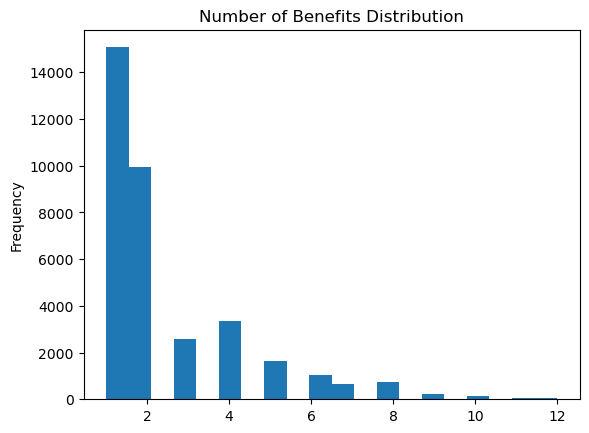

In [326]:
final_data['num_benefits'].plot(kind='hist', bins=20, title='Number of Benefits Distribution');

In [327]:
for col in final_data.columns:
    if col.startswith('benefit_'):
        print(f'{col}: {final_data[col].nunique()}')


benefit_401(k): 2
benefit_Child care support: 2
benefit_Commuter benefits: 2
benefit_Dental insurance: 2
benefit_Disability insurance: 2
benefit_Medical insurance: 2
benefit_Paid maternity leave: 2
benefit_Paid paternity leave: 2
benefit_Pension plan: 2
benefit_Student loan assistance: 2
benefit_Tuition assistance: 2
benefit_Vision insurance: 2


In [328]:
for col in final_data.columns:
    if col.startswith('benefit_'):
        print(f'{col}: {final_data[col].isnull().sum()}')

benefit_401(k): 0
benefit_Child care support: 0
benefit_Commuter benefits: 0
benefit_Dental insurance: 0
benefit_Disability insurance: 0
benefit_Medical insurance: 0
benefit_Paid maternity leave: 0
benefit_Paid paternity leave: 0
benefit_Pension plan: 0
benefit_Student loan assistance: 0
benefit_Tuition assistance: 0
benefit_Vision insurance: 0


In [329]:
final_data.dtypes

job_id                               int64
company_name                        object
title                               object
description                         object
location                            object
company_id                         float64
formatted_work_type                 object
application_type                    object
work_type                           object
currency                            object
compensation_type                   object
standardized_max_salary            float64
standardized_min_salary            float64
standardized_med_salary            float64
benefit_401(k)                      object
benefit_Child care support          object
benefit_Commuter benefits           object
benefit_Dental insurance            object
benefit_Disability insurance        object
benefit_Medical insurance           object
benefit_Paid maternity leave        object
benefit_Paid paternity leave        object
benefit_Pension plan                object
benefit_Stu

In [330]:
#convert num_benefits to int
final_data['num_benefits'] = final_data['num_benefits'].astype(int)

In [331]:
final_data['num_benefits'].unique()

array([ 1,  4,  6,  5,  2,  3,  8,  7,  9, 12, 10, 11])

the output is non negative integers so let's try how a poisson regression model will perform 

In [332]:
import statsmodels.formula.api as smf


# Poisson regression formula
poisson_formula = "num_benefits ~ company_size + C(industry_cluster)"

# Fit the model
poisson_model = smf.poisson(formula=poisson_formula, data=final_data).fit()

# Print the model summary
print(poisson_model.summary())

# Predict on the data
final_data['predicted_num_benefits'] = poisson_model.predict(final_data)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_true = final_data['num_benefits']
y_pred = final_data['predicted_num_benefits']
print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
print("R^2 Score:", r2_score(y_true, y_pred))

Optimization terminated successfully.
         Current function value: 1.823472
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:           num_benefits   No. Observations:                35530
Model:                        Poisson   Df Residuals:                    35504
Method:                           MLE   Df Model:                           25
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.04427
Time:                        13:57:40   Log-Likelihood:                -64788.
converged:                       True   LL-Null:                       -67789.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Interc

the results are not satisfactory so lets try with linear regression instead

In [333]:
import statsmodels.formula.api as smf
import numpy as np


#transform num_benefits to int
final_data['num_benefits'] = final_data['num_benefits'].astype(int)

# Build the regression formula
formula = "num_benefits ~ company_size + C(industry_cluster) + standardized_max_salary + employee_count"

# Fit the model
model = smf.ols(formula=formula, data=final_data).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           num_benefits   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:57:41   Log-Likelihood:                -71443.
No. Observations:               35530   AIC:                         1.429e+05
Df Residuals:                   35502   BIC:                         1.432e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

the results of linear regression is not satisfactory either so we can try a logsitc regression but we will need to apply some feature engineering by assigning categories to number of benefits and creating bins accordingly and this would the target variable in the logistic regression model

In [334]:
final_data['num_benefits'].unique()

array([ 1,  4,  6,  5,  2,  3,  8,  7,  9, 12, 10, 11])

In [335]:
bins = [0, 5, 10, final_data['num_benefits'].max()]
labels = ['Low', 'Medium', 'High']
final_data['benefit_level'] = pd.cut(final_data['num_benefits'], bins=bins, labels=labels)


In [336]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = final_data[['company_size', 'employee_count', 'industry_cluster', 'standardized_max_salary']]
y = final_data['benefit_level']

X = pd.get_dummies(X, columns=['industry_cluster'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[   0   25    0]
 [   0 6532    0]
 [   0  549    0]]
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        25
         Low       0.92      1.00      0.96      6532
      Medium       0.00      0.00      0.00       549

    accuracy                           0.92      7106
   macro avg       0.31      0.33      0.32      7106
weighted avg       0.84      0.92      0.88      7106



/Users/sanabarakat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanabarakat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanabarakat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the accuracy of the model is very good, however the rest of the values are very weak we can also see that the data is very imbalanced and the levels of benefits have different count values in the dataset so to fix that, we will try using SMOTE

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  

X = final_data[['company_size', 'employee_count', 'industry_cluster', 'standardized_max_salary']]
y = final_data['benefit_level'] 

X = pd.get_dummies(X, columns=['industry_cluster'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', penalty='l2', C=0.1)
log_reg.fit(X_train_sm, y_train_sm)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[   0   26    0]
 [   0 6516    0]
 [   0  564    0]]
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        26
         Low       0.92      1.00      0.96      6516
      Medium       0.00      0.00      0.00       564

    accuracy                           0.92      7106
   macro avg       0.31      0.33      0.32      7106
weighted avg       0.84      0.92      0.88      7106



/Users/sanabarakat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanabarakat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanabarakat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


both models are performing very similarily and are not able to detect the patterns in the minority class so lets try instead of using train-test split to use stratified K-means split and then compare the results

In [338]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Features and target
X = final_data[['company_size', 'employee_count', 'standardized_max_salary', 'industry_cluster']]
y = final_data['benefit_level']

# One-hot encode the categorical variable 'industry_cluster'
X = pd.get_dummies(X, columns=['industry_cluster'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X[['company_size', 'employee_count', 'standardized_max_salary']] = scaler.fit_transform(
    X[['company_size', 'employee_count', 'standardized_max_salary']]
)

# Calculate class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=y.unique(), y=y)
class_weights_dict = {cls: weight for cls, weight in zip(y.unique(), class_weights)}

# Logistic regression model
log_reg = LogisticRegression(max_iter=1000, class_weight=class_weights_dict, random_state=42)

# Stratified K-Fold Cross Validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables for aggregated predictions
all_y_true = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in strat_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    log_reg.fit(X_train, y_train)

    # Predict on test data
    y_pred = log_reg.predict(X_test)

    # Append true and predicted labels
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# Convert to numpy arrays
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Final confusion matrix and classification report
conf_matrix = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[   59    25    48]
 [ 5044 19994  7541]
 [  701   751  1367]]

Classification Report:
               precision    recall  f1-score   support

        High       0.01      0.45      0.02       132
         Low       0.96      0.61      0.75     32579
      Medium       0.15      0.48      0.23      2819

    accuracy                           0.60     35530
   macro avg       0.38      0.52      0.33     35530
weighted avg       0.89      0.60      0.71     35530



While SMOTE did not improve the model's performance in this case, the train-test split approach still outperformed stratified K-Fold. However, the inability of both approaches to effectively classify minority classes highlights the need for exploring alternative techniques.

After observing the limitations of the stratified splitting approach, which resulted in poor performance across minority classes despite attempts to balance the data, I transitioned to a more targeted modeling approach. This new model focuses on predicting the likelihood of each individual benefit being offered (as binary outcomes) rather than grouping benefits into broader categories. By looping through each benefit column, I can build a dedicated logistic regression model for each benefit, allowing for more granular analysis. Additionally, this approach enables better handling of binary imbalanced data by applying balanced class weights within the logistic regression algorithm.

In [339]:
final_data_model2 = final_data.drop(columns=['predicted_num_benefits', 'benefit_level'])

In [340]:
final_data_model2

,job_id,company_name,title,description,location,company_id,formatted_work_type,application_type,work_type,currency,compensation_type,standardized_max_salary,standardized_min_salary,standardized_med_salary,benefit_401(k),benefit_Child care support,benefit_Commuter benefits,benefit_Dental insurance,benefit_Disability insurance,benefit_Medical insurance,benefit_Paid maternity leave,benefit_Paid paternity leave,benefit_Pension plan,benefit_Student loan assistance,benefit_Tuition assistance,benefit_Vision insurance,employee_count,company_size,num_benefits,industry_id,industry_cluster
0,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"New Hyde Park, NY",766262.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,175000.0,140000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,222,2.0,1,9.0,Legal and Law Enforcement
1,69333422,Staffing Theory,Senior Product Marketing Manager,A leading pharmaceutical company committed to ...,United States,27097933.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,True,False,True,False,False,False,False,False,True,7,1.0,4,104.0,Professional Services and Consulting
2,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",Greater Philadelphia,4028816.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,True,False,True,True,True,True,False,False,True,40,4.0,6,126.0,Miscellaneous and Other Services
3,117675818,Premier Family Clinic,Physician Assistant,We are seeking a qualified Physician Assistant...,"Atlanta, GA",4285947.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,80000.0,60000.0,25.5,False,False,False,False,False,True,False,False,False,False,False,False,11,1.0,1,13.0,Miscellaneous and Other Services
4,231010577,Pierce Refrigeration,Service / Construction Technician,Company DescriptionPierce Refrigeration is a f...,"West Bridgewater, MA",6482450.0,Full-time,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,False,False,False,False,False,False,False,10,1.0,1,22.0,Food and Beverage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35526,3906266248,GoodRx,"Account Manager, Client Success",GoodRx is America’s healthcare marketplace. Ea...,United States,2466850.0,Full-time,OffsiteApply,FULL_TIME,USD,BASE_SALARY,80000.0,60000.0,25.5,True,False,False,False,False,True,False,False,False,False,False,True,1044,4.0,3,14.0,Healthcare and Biotechnology
35527,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4,17.0,Healthcare and Biotechnology
35528,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4,15.0,Healthcare and Biotechnology
35529,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,"Irvine, CA",122451.0,Contract,ComplexOnsiteApply,CONTRACT,USD,BASE_SALARY,104000.0,62400.0,53040.0,True,False,False,True,False,True,False,False,False,False,False,True,680,5.0,4,12.0,Healthcare and Biotechnology


In [341]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Loop through each benefit column
benefit_columns = [col for col in final_data_model2.columns if col.startswith('benefit_')]

# Store results
results = {}

for benefit in benefit_columns:
    print(f"=== Analyzing {benefit} ===")
    
    # Define target (binary: 0/1) and predictors
    y = final_data_model2[benefit]
    X = final_data_model2[['company_size', 'employee_count', 'industry_cluster', 'standardized_max_salary']]
    
    # Clean the target variable
    y = y.replace({True: 1, False: 0}).astype('int')  # Ensure binary encoding
    y = y.dropna()  # Drop missing values
    
    # Match features with cleaned target
    valid_indices = y.index
    X = X.loc[valid_indices]
    
    # One-hot encode categorical predictors
    X = pd.get_dummies(X, columns=['industry_cluster'], drop_first=True)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train logistic regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    log_reg.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = log_reg.predict(X_test)
    
    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    print(f"Classification Report for {benefit}:\n", class_report)
    
    # Store results for later analysis
    results[benefit] = {
        "conf_matrix": conf_matrix,
        "class_report": class_report
    }


=== Analyzing benefit_401(k) ===
Classification Report for benefit_401(k):
               precision    recall  f1-score   support

           0       0.33      0.04      0.07      1367
           1       0.81      0.98      0.89      5739

    accuracy                           0.80      7106
   macro avg       0.57      0.51      0.48      7106
weighted avg       0.72      0.80      0.73      7106

=== Analyzing benefit_Child care support ===
Classification Report for benefit_Child care support:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7021
           1       0.00      0.00      0.00        85

    accuracy                           0.99      7106
   macro avg       0.49      0.50      0.50      7106
weighted avg       0.98      0.99      0.98      7106

=== Analyzing benefit_Commuter benefits ===
Classification Report for benefit_Commuter benefits:
               precision    recall  f1-score   support

           0     

The results from the logistic regression model applied to individual benefits reveal significant challenges in predicting certain benefit offerings. For benefits like 401(k) and Medical Insurance, the model demonstrates some degree of predictive capability, with reasonable precision and recall for the dominant class (offering the benefit). However, the performance is poor for other benefits such as Child Care Support, Pension Plan, and Vision Insurance, where the minority class (offering the benefit) is either completely misclassified or shows negligible predictive power. This is evident from the f1-scores being consistently low or zero for these cases.

In conclusion, while logistic regression provides insights into the dominant benefit offerings, it falls short of effectively predicting rare benefits. Addressing data imbalance and incorporating additional features could enhance the model's performance in capturing nuanced relationships between benefits and predictors like company size, industry cluster, and employee count.

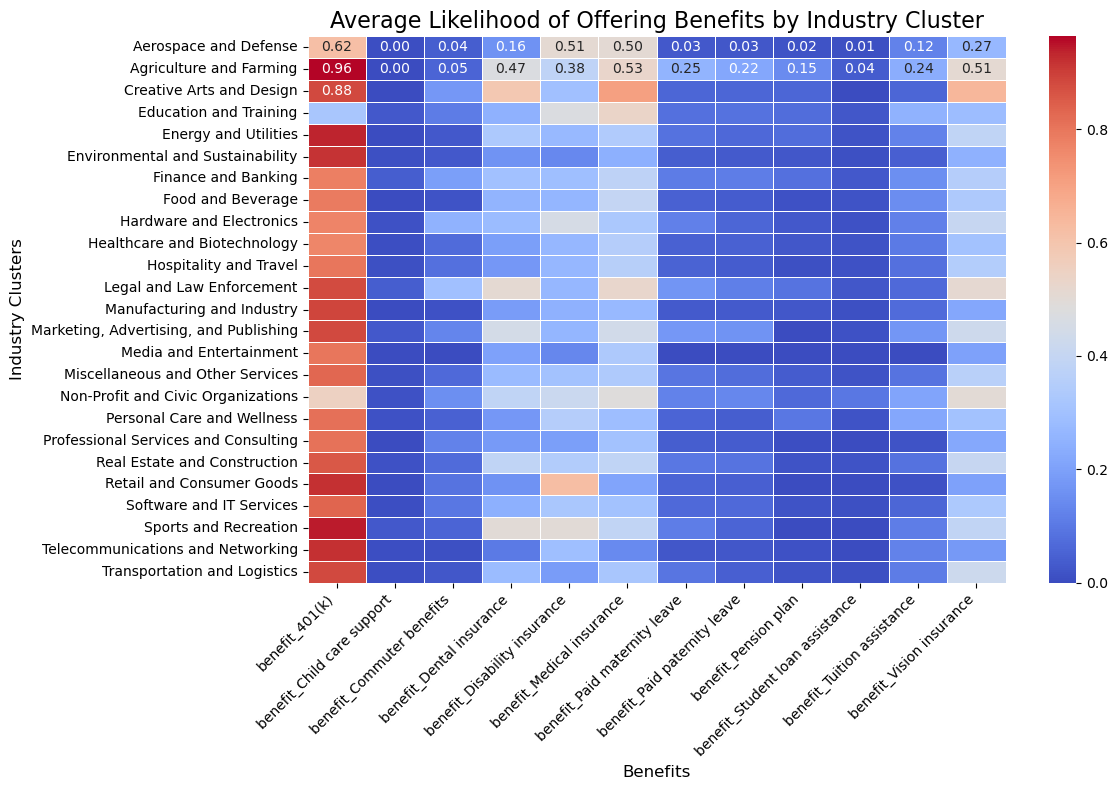

In [342]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all benefit columns are numeric
benefit_columns = [col for col in final_data_model2.columns if col.startswith('benefit_')]
final_data_model2[benefit_columns] = final_data_model2[benefit_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in benefit columns (if necessary)
final_data_model2.dropna(subset=benefit_columns, inplace=True)

# Aggregate the data by industry cluster to calculate the mean for each benefit
aggregated_data = final_data_model2.groupby('industry_cluster')[benefit_columns].mean()

# Plot a heatmap of the aggregated data
plt.figure(figsize=(12, 8))
sns.heatmap(aggregated_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Average Likelihood of Offering Benefits by Industry Cluster", fontsize=16)
plt.xlabel("Benefits", fontsize=12)
plt.ylabel("Industry Clusters", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


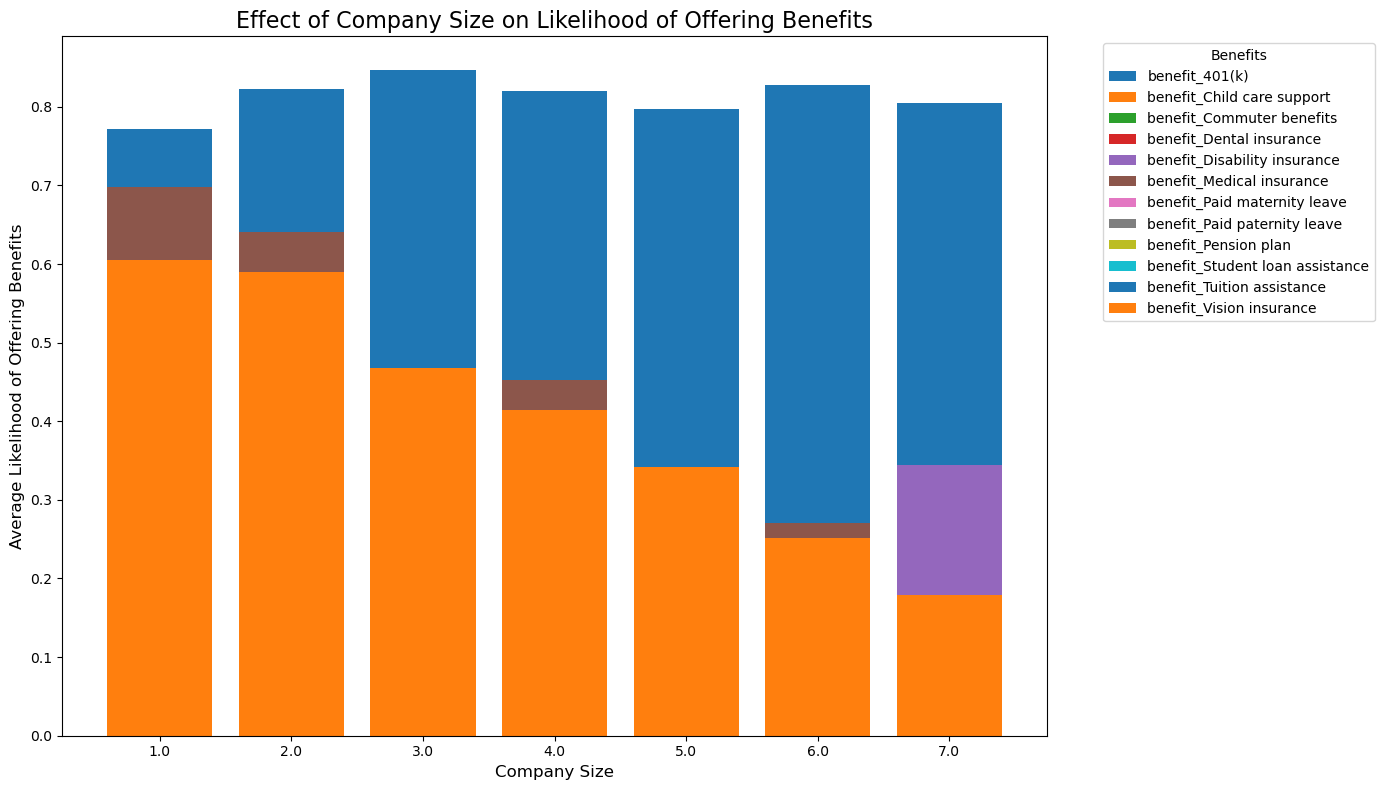

In [343]:
import matplotlib.pyplot as plt

# Aggregate the data by company size to calculate the mean likelihood of offering each benefit
company_size_aggregation = final_data_model2.groupby('company_size')[benefit_columns].mean()

# Plot a bar chart for the effect of company size on benefits
plt.figure(figsize=(14, 8))

# Loop through the benefit columns to create a stacked bar chart
for benefit in benefit_columns:
    plt.bar(
        company_size_aggregation.index,
        company_size_aggregation[benefit],
        label=benefit
    )

plt.title("Effect of Company Size on Likelihood of Offering Benefits", fontsize=16)
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Average Likelihood of Offering Benefits", fontsize=12)
plt.xticks(ticks=company_size_aggregation.index, labels=company_size_aggregation.index, fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Benefits")
plt.tight_layout()

plt.show()

